<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialiser" data-toc-modified-id="Initialiser-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialiser</a></span></li><li><span><a href="#Plot-of-Histogram-+-Scatter-Plot-Overlap" data-toc-modified-id="Plot-of-Histogram-+-Scatter-Plot-Overlap-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot of Histogram + Scatter Plot Overlap</a></span></li><li><span><a href="#Histogram-of-kappa-theta" data-toc-modified-id="Histogram-of-kappa-theta-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Histogram of kappa theta</a></span></li><li><span><a href="#Scatter-plots-for-mean-kappa-vs-theta-with-total-cells" data-toc-modified-id="Scatter-plots-for-mean-kappa-vs-theta-with-total-cells-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scatter plots for mean kappa vs theta with total cells</a></span></li></ul></div>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import copy
from mpl_toolkits import mplot3d
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
import numpy.ma as ma
import matplotlib.transforms as mtransforms
from scipy.ndimage.filters import uniform_filter1d
from matplotlib import gridspec

# Initialiser

In [47]:
initialiser_list = {'0':['1000',4, 10, 4, 3, 1, 0.05, 1.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.05],\
                    '1d':['1001',1500, 5000, 4, 10, 1, 0.05, 1.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.05],\
                    'test':['test',300, 1000, 4, 10, 1, 0.05, 1.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.05],\
                    '1b':['1001b',1000, 3000, 4, 10, 1, 0.05, 1.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.05],\
                    '2d':['1002',1500, 5000, 4, 10, 1, 0.05, 1.0, 4.0, 4.0, 0.0, 0.0, 0.2, 0.05],\
                    '3d':['1003',1500, 5000, 4, 10, 1, 0.05, 1.0, -4.0, -4.0, 0.0, 0.0, 0.2, 0.05],\
                    '4d':['1004',1500, 5000, 4, 10, 1, 0.05, 1.0, -4.0, 4.0, 0.0, 0.0, 0.2, 0.05],\
                    '1c':['1001c',1500, 5000, 4, 10, 1, 0.05, 0.5, 0.0, 0.0, 0.0, 0.0, 0.2, 0.05],\
                    '2c':['1002c',1500, 5000, 4, 10, 1, 0.05, 0.5, 4.0, 4.0, 0.0, 0.0, 0.2, 0.05],\
                   '3c':['1003c',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, -4.0, 0.0, 0.0, 0.2, 0.05],\
                   '4c':['1004c',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 0.0, 0.2, 0.05],\
                    '5c':['1005c',1500, 5000, 4, 10, 1, 0.05, 0.5, 0.0, 0.0, 0.5, 0.5, 0.2, 0.05],\
                    '6c':['1006c',1500, 5000, 4, 10, 1, 0.05, 0.5, 4.0, 4.0, 0.5, 0.5, 0.2, 0.05],\
                   '7c':['1007c',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, -4.0, 0.5, 0.5, 0.2, 0.05],\
                   '8c':['1008c',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.5, 0.5, 0.2, 0.05],\
                   '9c':['1009c',1500, 5000, 4, 10, 1, 0.05, 0.5, 0.0, 0.0, 1.0, 1.0, 0.2, 0.05],\
                    '10c':['1010c',1500, 5000, 4, 10, 1, 0.05, 0.5, 4.0, 4.0, 1.0, 1.0, 0.2, 0.05],\
                   '11c':['1011c',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, -4.0, 1.0, 1.0, 0.2, 0.05],\
                   '12c':['1012c',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 1.0, 1.0, 0.2, 0.05],\
                   '13c':['1013c',1500, 5000, 4, 10, 1, 0.05, 0.5, 0.0, 0.0, 0.0, 1.0, 0.2, 0.05],\
                    '14c':['1014c',1500, 5000, 4, 10, 1, 0.05, 0.5, 4.0, 4.0, 0.0, 1.0, 0.2, 0.05],\
                   '15c':['1015c',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, -4.0, 0.0, 1.0, 0.2, 0.05],\
                   '16c':['1016c',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05],\
                   '17c':['1017c',1500, 5000, 4, 10, 1, 0.05, 0.5, -2.0, -2.0, 0.0, 1.0, 0.2, 0.05],\
                   '0nke':['1000nke',1500, 5000, 4, 10, 1, 0.05, 0.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.05],\
                   '1nke':['1001nke',1500, 5000, 4, 10, 1, 0.05, 0.5, -1.0, -1.0, 0.0, 1.0, 0.0, 0.05],\
                   '2nke':['1002nke',1500, 5000, 4, 10, 1, 0.05, 0.5, -2.0, -2.0, 0.0, 1.0, 0.0, 0.05],\
                   '3nke':['1003nke',1500, 5000, 4, 10, 1, 0.05, 0.5, -3.0, -3.0, 0.0, 1.0, 0.0, 0.05],\
                   '4nke':['1004nke',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, -4.0, 0.0, 1.0, 0.0, 0.05],\
                   '5nke':['1005nke',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 0.0, 0.0, 1.0, 0.0, 0.05],\
                   '1nte':['1001nte',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 0.0, 0.85, 0.95, 0.2, 0.00],\
                   '18c':['1018c',1500, 5000, 4, 10, 1, 0.05, 0.5, -8.0, -8.0, 0.5, 1.0, 0.2, 0.05],\
                    '16c2':['1016c2',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.4, 0.1],\
                   '16cB2':['1016cB2',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05],\
                    '16cB1_5':['1016cB1_5',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05],
                   '16cB1_75':['1016cB1_75',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05],\
                   '16cB1_25':['1016cB1_25',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05],\
                   '16cB2_25':['1016cB2_25',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05],\
                   '16cB2_5':['1016cB2_5',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05],\
                   '16cB2_75':['1016cB2_75',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05],\
                   '16cB3':['1016cB3',1500, 5000, 4, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05],\
                   '16mem1_00':['1016mem1_00',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 1.00],\
                   '16mem2_00':['1016mem2_00',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 2.00],\
                   '16mem1_25':['1016mem1_25',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 1.25],\
                   '16mem0_25':['1016mem0_25',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 0.25],\
                   '16mem0_50':['1016mem0_50',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 0.50],\
                   '16mem0_75':['1016mem0_75',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 0.75],\
                   '16mem0_00':['1016mem0_00',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 0.00],\
                   '16mem3_00':['1016mem3_00',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 3.00],\
                   '16memv1_00':['1016memv1_00',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 1.00],\
                   '16memv2_00':['1016memv2_00',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 2.00],\
                   '16memv3_00':['1016memv3_00',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 3.00],\
                   '16memr1_00':['1016memr1_00',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 1.00],\
                   '16memr2_00':['1016memr2_00',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 2.00],\
                   '16memr3_00':['1016memr3_00',1500, 5000, 8, 10, 1, 0.05, 0.5, -4.0, 4.0, 0.0, 1.0, 0.2, 0.05, 3.00]}


#redo 4nke vis

In [48]:
Runs = 3
sim_num = '16memr1_00'
ID = initialiser_list[sim_num][0]
kappa_min = initialiser_list[sim_num][8]
kappa_max = initialiser_list[sim_num][9]
theta_min = initialiser_list[sim_num][10]
theta_max = initialiser_list[sim_num][11]
kappas = np.linspace(kappa_min,kappa_max)
thetas = np.linspace(theta_min, theta_max)
tmax = initialiser_list[sim_num][2]
L = initialiser_list[sim_num][1]
nodes = 1 + np.arange(L, dtype=np.uint)
output_dir = "output/"

In [49]:
kappa_mean = np.zeros([Runs, tmax+1, L])
theta_mean = np.zeros([Runs, tmax+1, L])
density = np.zeros([Runs, tmax+1, L])
kappa_lattice_mean = np.zeros([Runs, tmax+1])
theta_lattice_mean = np.zeros([Runs, tmax+1])
total_cells = np.zeros([Runs, tmax+1])
#density_rest = np.zeros([Runs, tmax, L])
#density_vel = np.zeros([Runs, tmax, L])

In [50]:
for run in range(Runs):
    kappa_mean[run,:,:] = np.genfromtxt(output_dir + initialiser_list[sim_num][0] + '/Run %s/' %str(run+1) + "/" + "kappa.csv", delimiter = ", " )
    theta_mean[run,:,:] = np.genfromtxt(output_dir + initialiser_list[sim_num][0] + '/Run %s/' %str(run+1) + "/" + "theta.csv", delimiter = ", " )
    density[run,:,:] = np.genfromtxt(output_dir + initialiser_list[sim_num][0] + '/Run %s/' %str(run+1) + "/" + "density.csv", delimiter = ", " )


In [51]:
kappa_mean = ma.masked_equal(kappa_mean, -1000)

kappa_lattice_mean = np.mean(kappa_mean, axis=2)
theta_mean = ma.masked_equal(theta_mean, -1000)
theta_lattice_mean = np.mean(theta_mean, axis=2)
density = ma.masked_equal(density, -1000)

total_cells = np.sum(density, axis=2)


# Plot of Histogram + Scatter Plot Overlap

# Histogram of kappa theta

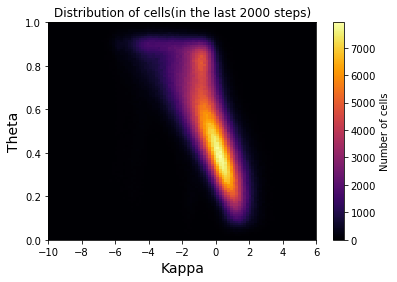

In [52]:
if not os.path.exists(output_dir + initialiser_list[sim_num][0] + '/Pictures/'):
        os.makedirs(output_dir + initialiser_list[sim_num][0] + '/Pictures/')

plt.figure()
#ax = fig.add_subplot(1, 1, 1) 
plt.hist2d(kappa_mean[:,3000:,:].flatten(), theta_mean[:,3000:,:].flatten(), bins=100, range=[[-10,6],[-0.0,1.0]], cmap=plt.cm.inferno)
plt.colorbar(label = "Number of cells")
plt.xlabel("Kappa", size=14)
plt.ylabel("Theta", size=14)
plt.title("Distribution of cells(in the last 2000 steps)")
plt.savefig(output_dir + initialiser_list[sim_num][0] + '/Pictures/kt_hist.jpg')

In [53]:
# Run separated histogram

# Scatter plots for mean kappa vs theta with total cells

In [54]:
dt = 50
total_times = int(tmax/dt)+1
if not os.path.exists(output_dir + initialiser_list[sim_num][0] + '/Pictures/Mean_kt_scatter/'):
        os.makedirs(output_dir + initialiser_list[sim_num][0] + '/Pictures/Mean_kt_scatter/')
for t in range(total_times):
    fig, ax = plt.subplots()
    plt.scatter(kappa_lattice_mean[:,dt*t], theta_lattice_mean[:,dt*t], c = total_cells[:,dt*t], cmap='viridis', s=total_cells[:,dt*t]/2.0, linewidth=0, alpha=0.2)
    plt.colorbar(label='Total Cells')
    #plt.scatter(kappa_lattice_mean[:,dt*t], theta_lattice_mean[:,dt*t], alpha = 0.5)
    plt.xlabel('Kappa')
    plt.ylabel('Theta')
    plt.xlim([-10,6])
    
    plt.ylim([-0.5,1.5])
    plt.title('Mean Kappa and Theta at time: ' + str(dt*t))
    plt.legend(title = 'Radius = Total Number of Cells')
    plt.scatter(kappas, thetas, alpha=0.005)
    plt.grid(which='both')
    ax.fill_between(kappas, np.linspace(theta_min, theta_min), np.linspace(theta_max,theta_max),facecolor='red', alpha=0.05)
    for run in range(Runs):
        plt.annotate(str(run+1), (kappa_lattice_mean[run,dt*t], theta_lattice_mean[run,dt*t]))
    plt.savefig(output_dir + initialiser_list[sim_num][0] + '/Pictures/Mean_kt_scatter/' + str(t) + '.jpg', dpi=200)
    fig.clear()
    plt.close(fig)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

In [55]:
dt = 50
total_times = int(tmax/dt)+1
valid = np.logical_not(kappa_mean.mask)
for run in range(Runs):
    if not os.path.exists(output_dir + initialiser_list[sim_num][0] + '/Pictures/Run %s/' %str(run+1) + '/spatiotemp_scatter_smooth/'):
            os.makedirs(output_dir + initialiser_list[sim_num][0] + '/Pictures/Run %s/' %str(run+1) + '/spatiotemp_scatter_smooth/')
    min_kappa = min(kappa_mean[run,:,:][valid[run,:,:]])
    max_kappa = max(kappa_mean[run,:,:][valid[run,:,:]])
    for t in range(total_times):
        fig = plt.figure(figsize=((6,6)));
        N = 25
        fig.suptitle('Spatial distribution of properties at time %s smoothened \n over a neighbourhood of %d nodes\n (colour indicates actual value)'%(str(t*dt), N), fontsize=8);
        
        # set height ratios for sublots
        gs = gridspec.GridSpec(3, 1) 
        
        
        new_nodes = nodes[valid[run,dt*t,:]]
        # the fisrt subplot
        ax0 = plt.subplot(gs[0]);
        plot0 = ax0.scatter(new_nodes, uniform_filter1d(kappa_mean[run,dt*t,:][valid[run,dt*t,:]], size=N, mode='reflect'), c=kappa_mean[run,dt*t,:][valid[run,dt*t,:]], cmap='viridis', linewidth=0, alpha=0.2);
        fig.colorbar(plot0, ax=ax0)
        ax0.set_ylabel(r'$\kappa_{avg}$')
        ax0.set_xlim(-10,L)
        ax0.set_ylim(min_kappa,max_kappa)
        #ax0.set_ylim(min_kappa,2.0)
        ax0.grid(True)
        
        #the second subplot
        # shared axis X
        ax1 = plt.subplot(gs[1], sharex = ax0);
        plot1 = ax1.scatter(new_nodes, uniform_filter1d(theta_mean[run,dt*t,:][valid[run,dt*t,:]], size=N, mode='reflect'), c=theta_mean[run,dt*t,:][valid[run,dt*t,:]], cmap='viridis', linewidth=0, alpha=0.2);
        fig.colorbar(plot1, ax=ax1)
        ax1.set_ylabel(r'$\theta_{avg}$');
        ax1.set_xlim(-10,L);
        ax1.set_ylim(-0.1,1.1);
        ax1.grid(True);
        
        plt.setp(ax0.get_xticklabels(), visible=False);
        plt.setp(ax1.get_xticklabels(), visible=False);
        # remove last tick label for the second subplot
        yticks = ax1.yaxis.get_major_ticks();
        yticks[-1].label1.set_visible(False);
        
        ax2 = plt.subplot(gs[2], sharex = ax0);
        plot2 = ax2.scatter(new_nodes, uniform_filter1d(density[run,dt*t,:][valid[run,dt*t,:]], size=N, mode='reflect'), c=density[run,dt*t,:][valid[run,dt*t,:]], cmap='viridis', linewidth=0, alpha=0.2);
        fig.colorbar(plot2, ax=ax2)
        ax2.set_xlabel('Node Number');
        ax2.set_ylabel('Number of \n cells')#r'$\rho$');
        ax2.set_xlim(-10,L);
        ax2.set_ylim(0,8);
        ax2.grid(True);
        
        #plt.setp(ax0.get_xticklabels(), visible=False)
        # remove last tick label for the second subplot
        xticks2 = ax2.xaxis.get_major_ticks();
        xticks2[-1].label1.set_visible(False);
        plt.subplots_adjust(hspace=0.0);
        
        fig.tight_layout();
        plt.savefig(output_dir + initialiser_list[sim_num][0] + '/Pictures/Run %s/' %str(run+1) + '/spatiotemp_scatter_smooth/' + str(t) + '.jpg'.format(t), dpi=200);
        #plt.savefig(output_dir + initialiser_list[sim_num][0] + '/Pictures/Run %s/' %str(run+1) + '/spatiotemp_scatter_smooth/Not{:04d}.jpg'.format(t), dpi=200);
        plt.close()
        """
        fig, axs = plt.subplots(3,1)
        fig.suptitle('Spatial Distribution of Properties at time %s'%str(t*dt), y=1.0)
        
        #value of scatter is averaged over a window of size N, colour of the point is their actual value
        N = 5
        valid = np.logical_not(kappa_mean.mask)
        new_nodes = nodes[valid[run,dt*t,:]]
        #axs[0].scatter(nodes[valid], np.convolve(kappa_mean[run,dt*t,:][valid], np.ones(N)/N, mode='full'), c=kappa_mean[run,dt*t,:], cmap='viridis', linewidth=0, alpha=0.2)
        axs[0].scatter(new_nodes, uniform_filter1d(kappa_mean[run,dt*t,:][valid[run,dt*t,:]], size=N, mode='reflect'), c=kappa_mean[run,dt*t,:][valid[run,dt*t,:]], cmap='viridis', linewidth=0, alpha=0.2)
        axs[0].set_xlabel('Node Number')
        axs[0].set_ylabel('Average Kappa')
        axs[0].set_xlim(-10,L)
        axs[0].set_ylim(min_kappa,max_kappa)
        axs[0].grid(True)
        
        axs[1].scatter(new_nodes, uniform_filter1d(theta_mean[run,dt*t,:][valid[run,dt*t,:]], size=N, mode='reflect'), c=theta_mean[run,dt*t,:][valid[run,dt*t,:]], cmap='viridis', linewidth=0, alpha=0.2)
        axs[1].set_xlabel('Node Number')
        axs[1].set_ylabel('Average Theta')
        axs[1].set_xlim(-10,L)
        axs[1].set_ylim(-0.3,1.3)
        axs[1].grid(True)
        
        axs[2].scatter(new_nodes, uniform_filter1d(density[run,dt*t,:][valid[run,dt*t,:]], size=N, mode='reflect'), c=density[run,dt*t,:][valid[run,dt*t,:]], cmap='viridis', linewidth=0, alpha=0.2)
        axs[2].set_xlabel('Node Number')
        axs[2].set_ylabel('Density')
        axs[2].set_xlim(-10,L)
        axs[2].set_ylim(0,8)
        axs[2].grid(True)
        """
        